In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [2]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))


# As a sanity check, print out the shapes of the data
print ('Training data shape: ', X_train.shape)
print ('Test data shape: ', X_test.shape)


Training data shape:  (50000, 3072)
Test data shape:  (10000, 3072)


In [3]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)

In [4]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_test -= mean_image

In [5]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print (X_train.shape, X_test.shape)


(50000, 3073) (10000, 3073)


In [10]:
def svm_loss(W, X, y, reg):
  dW = np.zeros(W.shape) # initialize the gradient as zero

  # compute the loss and the gradient
  num_classes = W.shape[1]
  num_train = X.shape[0]
  loss = 0.0
  f = X.dot(W)
  f -= np.max(f, axis=1, keepdims=True) # max of every sample
  sum_f = np.sum(np.exp(f), axis=1, keepdims=True)
  p = np.exp(f)/sum_f

  loss = np.sum(-np.log(p[np.arange(num_train), y]))

  ind = np.zeros_like(p)
  ind[np.arange(num_train), y] = 1
  dW = X.T.dot(p - ind)

  loss /= num_train
  loss += 0.5 * reg * np.sum(W * W)
  dW /= num_train
  dW += reg*W
  return loss, dW

In [11]:
W = np.random.randn(3073, 10)*0.00001

In [12]:
def train_model(W, X, y, lr, reg, iter, batch_size):
  num_classes = W.shape[1]
  num_train = X.shape[0]
  losses = []
  for it in xrange(iter):
        batch = np.random.choice(np.arange(num_train), batch_size)
        batch_train = X[batch]
        batch_class = y[batch]
        loss, grad = svm_loss(W, batch_train, batch_class, reg)
        W += -lr*grad

  return losses, W
        
        

In [13]:
loss_rec, W = train_model(W, X_train, y_train, lr=2.507500e-06, reg=1.000000e+03, iter=1500, batch_size=200)

In [14]:
y_pred = np.zeros(X_test.shape[1])
print (y_pred.shape)

(3073,)


In [15]:
y_pred = np.argmax(X_test.dot(W), axis = 1)

In [16]:
print (y_pred)

[3 9 8 ..., 3 4 7]


In [17]:
print (np.mean(y_pred == y_test))

0.3956


In [19]:
print(W)

[[  1.40242700e-05  -1.16921121e-05   3.06178907e-07 ...,  -2.87867336e-05
    1.10423444e-04  -5.44889258e-05]
 [  1.75904135e-05  -5.10564187e-05   2.62910452e-05 ...,   4.17680540e-05
    8.30225360e-05   6.74572511e-05]
 [  1.62582560e-04  -4.08338470e-05  -1.46793225e-04 ...,   1.32487823e-04
    1.52785180e-04   2.03518964e-04]
 ..., 
 [ -8.20777469e-05  -1.46300690e-05  -4.19633044e-06 ...,   1.56062843e-04
   -2.75614018e-05   9.54486647e-05]
 [ -8.66590273e-05   5.08589336e-05  -8.64665915e-05 ...,  -9.65576171e-05
    1.38981787e-04   1.08472007e-04]
 [ -7.78506103e-06  -4.80359271e-06   1.34315224e-05 ...,   6.43910282e-06
   -1.47392616e-05  -1.01231285e-05]]


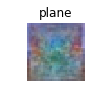

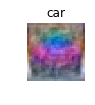

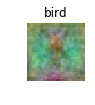

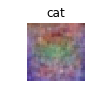

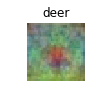

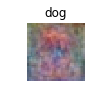

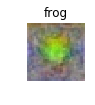

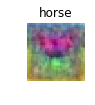

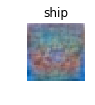

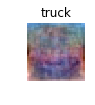

In [20]:
w = W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
  plt.show()